# Manchester United 2007–08 — Style Profile (Premier League)

This notebook explores Manchester United's 2007–08 Premier League season using
player-level data combined from FBref.

We will:
- Load the processed master dataset
- Get a squad overview (minutes, roles, usage)
- Examine attacking contribution (goals, shots)
- Look at defensive and miscellaneous actions
- Start building a quantitative "style profile" of this team


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Project paths
PROJECT_ROOT = Path("..").resolve()
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

# Load processed master dataset
df = pd.read_csv(DATA_PROCESSED / "manutd_2007_08_master.csv")

df.head()


,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,...,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Matches_dup.2
0,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.07,0.03,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.09,0.03,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.09,0.06,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.67,0.47,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Basic squad overview
print("Number of players:", df.shape[0])
print("Number of features:", df.shape[1])

df[["Player", "Pos", "Age", "90s", "Min"]].sort_values("Min", ascending=False).head(10)


Number of players: 32
Number of features: 69


,Player,Pos,Age,90s,Min
13,Edwin van der Sar,GK,36.0,28.5,2565.0
29,Tomasz Kuszczak,GK,25.0,8.5,765.0
7,Ben Foster,GK,24.0,1.0,90.0
0,0.03,0.03,NaN,NaN,NaN
1,0.07,0.07,NaN,NaN,NaN
2,0.09,0.09,NaN,NaN,NaN
3,0.09,0.09,NaN,NaN,NaN
4,0.67,0.67,NaN,NaN,NaN
5,1.21,1.08,NaN,NaN,NaN
6,Anderson,MF,19.0,16.5,NaN


In [5]:
# ---- Attacking contribution overview ----

attack_cols = ["Player", "Pos", "Gls", "Sh", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT"]

(
    df[attack_cols]
    .sort_values("Gls", ascending=False)
    .head(10)
)


,Player,Pos,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT
10,Cristiano Ronaldo,"FW,MF",31.0,NaN,89.0,NaN,2.92,NaN,0.30,NaN
8,Carlos Tevez,"FW,MF",14.0,NaN,52.0,NaN,1.75,NaN,0.27,NaN
30,Wayne Rooney,"FW,MF",12.0,NaN,53.0,NaN,2.19,NaN,0.23,NaN
18,Louis Saha,FW,5.0,NaN,9.0,NaN,1.09,NaN,0.33,NaN
28,Ryan Giggs,"FW,MF",3.0,NaN,18.0,NaN,0.73,NaN,0.17,NaN
21,Nani,"FW,MF",3.0,NaN,23.0,NaN,1.32,NaN,0.13,NaN
19,Michael Carrick,MF,2.0,NaN,8.0,NaN,0.33,NaN,0.25,NaN
27,Rio Ferdinand,DF,2.0,NaN,6.0,NaN,0.18,NaN,0.33,NaN
23,Owen Hargreaves,MF,2.0,NaN,6.0,NaN,0.35,NaN,0.33,NaN
31,Wes Brown,DF,1.0,NaN,4.0,NaN,0.12,NaN,0.25,NaN


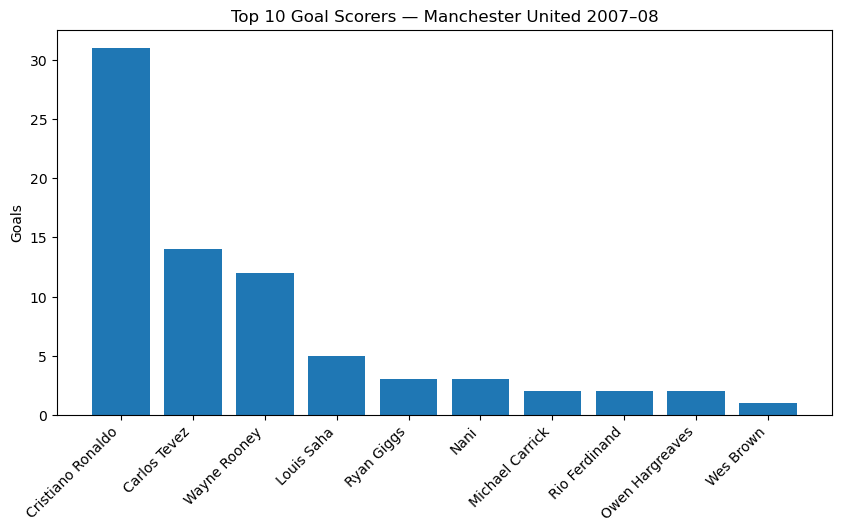

In [9]:
# ---- Visualization: Top goal scorers ----

top_scorers = df.sort_values("Gls", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_scorers["Player"], top_scorers["Gls"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Goals")
plt.title("Top 10 Goal Scorers — Manchester United 2007–08")
plt.show()
